## Introduction

In the following notebook, I will be preparing Listings data pertaining to San Francisco Airbnb's. Raw data can be found [here](http://insideairbnb.com/get-the-data.html).


**Read in libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set notebook preferences**

In [2]:
#Set options for pandas
pd.set_option('display.max_columns',1_000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth', 200)

#Set style for plot
plt.style.use('ggplot')

#Set path to visuals from EDA
visualizations = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Visualizations\Exploratory_Data_Analysis'

**Read in data**

In [3]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Read in data
df = pd.read_csv(path + '/2020_0715_Listings_Cleaned.csv', parse_dates=['last_review'],
                 dtype = {'zipcode':'object'}
                )

### Data Overview

In [4]:
#Preview data
print('Data shape:',df.shape)
display(df.head(3))

Data shape: (126258, 48)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,last_review,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
0,3,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets live on this property ,Dog(s),Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , Carbon monoxide detector , First aid kit ,Essentials,Shampoo, ...",0,77,0,1,1.0,Real Bed,1.0,2.0,1,0.0,0.0,moderate,San Francisco,100.0,25.0,2,1.0,1169,1.0,1.0,Holly,100.0,within an hour,"email , phone , facebook , reviews , kba",958,1,1,2019-03-16,37.76931,-122.43386,30,1,4200.0,Western Addition,183,170.0,Apartment,0,0,1,97.0,1.55,Entire home/apt,100.0,1120.0,94117
1,2,"TV,Internet,Wifi,Kitchen, Free street parking ,Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , Carbon monoxide detector , Fire extinguisher , Lock on bedroom door , Private entrance ...",30,365,60,90,4.0,Real Bed,1.0,1.0,9,9.0,0.0,strict 14 with grace period,San Francisco,50.0,12.0,1,1.0,21994,1.0,0.0,Aaron,100.0,within a few hours,"email , phone , reviews , jumio , government id",8142,0,1,2018-09-12,37.76487,-122.45183,90,32,1685.0,Haight Ashbury,8,65.0,Apartment,0,0,1,93.0,0.14,Private room,200.0,490.0,94117
2,5,"TV,Internet,Wifi,Kitchen,Heating, Family/kid friendly , Smoke detector , Carbon monoxide detector , First aid kit , Safety card , Fire extinguisher",30,90,60,90,1.5,Real Bed,2.0,2.0,2,0.0,0.0,strict 14 with grace period,San Francisco,225.0,150.0,2,1.0,24215,1.0,0.0,Rosy,100.0,within an hour,"email , phone , reviews , kba",8339,0,1,2018-08-11,37.77525,-122.43637,1125,7,NaN,Western Addition,27,785.0,House,1,1,1,97.0,0.23,Entire home/apt,0.0,NaN,94117


### Quick EDA

**Price Distribution**

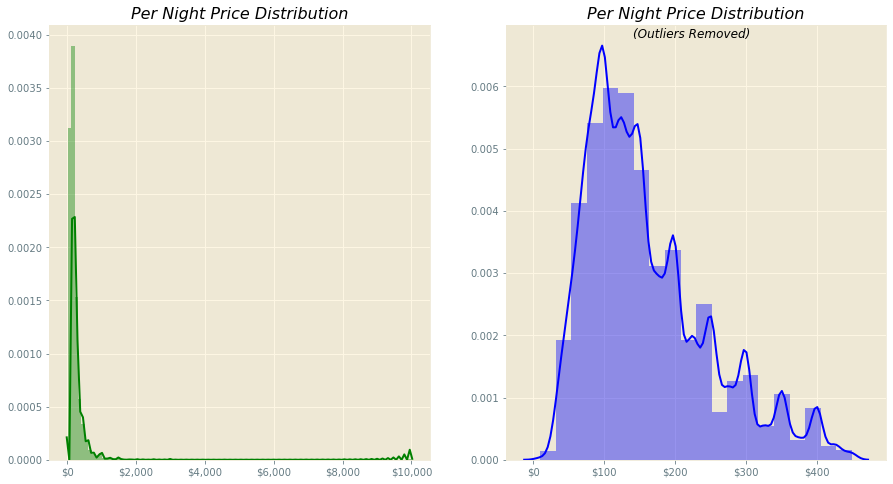

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(filename= visualizations +  '/price_hist.png', width=700, height=400)

**Price by Month**

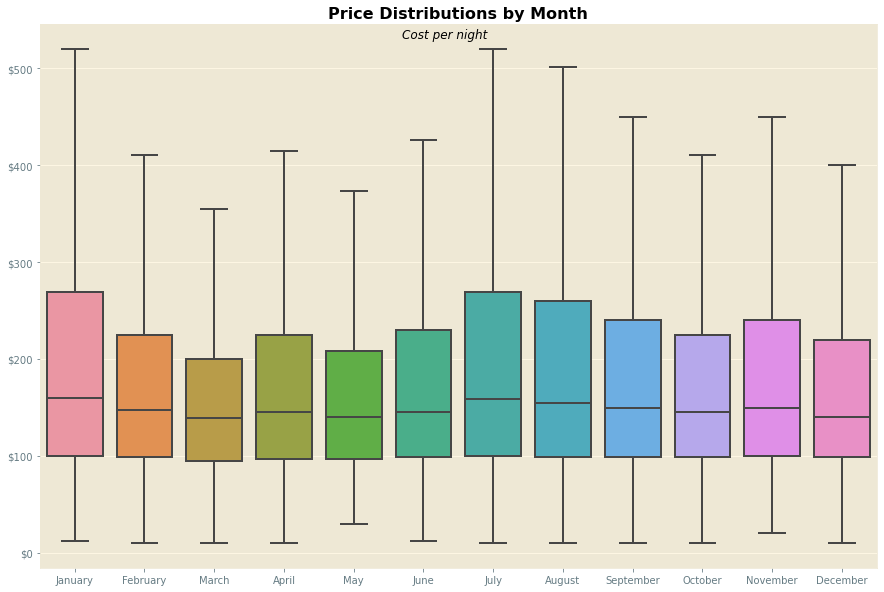

In [6]:
Image(filename= visualizations +  '/month_price_box.png', width=700, height=400)

**Price by Day**

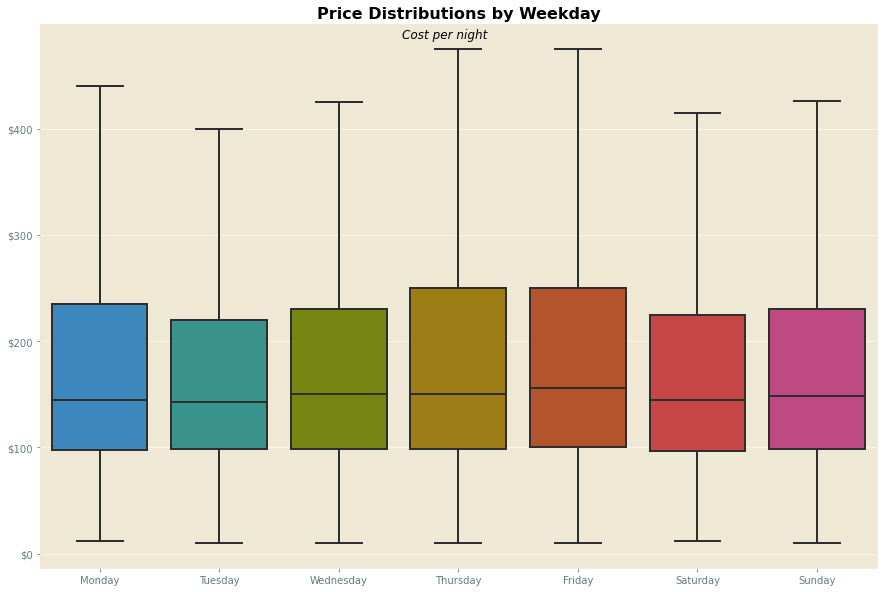

In [7]:
Image(filename= visualizations +  '/weekday_price_box.png', width=700, height=400)

**Remove outliers**

In [8]:
#Calculate IQR
q1,q3 = np.quantile(df.price, [.25,.75])
IQR = q3 - q1

#Set upper and lower limits for outliers to be removed
upper = q3 + (IQR * 1.5)
lower = q1 - (IQR * 1.5)

print('Length of df w/ outliers:',len(df))
print('Length of df w/o outliers:',len(df.loc[df.price <= upper]))

df = df.loc[df.price <= upper]

Length of df w/ outliers: 126258
Length of df w/o outliers: 116180


In [9]:
df.host_id.loc[df.price <= 20].unique()

array([  9776019,    576134,   3363650,  11168959,  53195251,  20678148,
        40214811,  58350764,  30014099, 331406546,   1934331, 209925587],
      dtype=int64)

### Feature Engineering

### Feature Engineering

**Encode Neighborhoods**

In [10]:
#Init empty dict to store encoded values
encode = {}

#Store encodings which will be mean price for each neighborhood
encode['neighbourhood_cleansed'] = df.groupby('neighbourhood_cleansed')['price'].mean()

#Map dictionary unto data fram
for k,v in encode.items():
    df[k + '_encoded'] = df[k].map(v)
    
#Drop original neighbourhood_cleansed from df
df.drop('neighbourhood_cleansed', axis = 1, inplace = True)

#Check
display(df.filter(regex='neighbourhood_cleansed').head(15))   

,neighbourhood_cleansed_encoded
0,177.720127
1,159.540691
3,177.720127
4,172.887796
5,177.799610
6,172.887796
7,159.540691
8,177.720127
9,148.852899
10,159.540691


**Add amenities_count**

In [11]:
#Get a count of amenities
df['amenities_count'] = df['amenities'].str.count(',') + 1 #count commas and add 1 for last word

#Drop amenities column, host_verifications,None. Sort cols alphabetically
df.drop(columns = ['amenities'],axis = 1, inplace = True)
df = df.reindex(sorted(df.columns), axis = 1)

#Check size of df
print(df.shape)

(116180, 48)


# Feature Selection

**Drop weekly and monthly price**

In [12]:
df.drop(['weekly_price', 'monthly_price'], axis = 1, inplace = True)

**Correlation matrix**

In [13]:
#Create corr
corr = df.corr()

#Subset features with .2  correlation with target
features = corr[(corr['price'] > .2) |(corr['price'] < -.2)].index.tolist()

#Add meaningful categorical variables
features.extend(['room_type', 'property_type', 'bed_type'])
features

['accommodates',
 'amenities_count',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'guests_included',
 'neighbourhood_cleansed_encoded',
 'price',
 'security_deposit',
 'room_type',
 'property_type',
 'bed_type']

## Inspect Feature Correlations

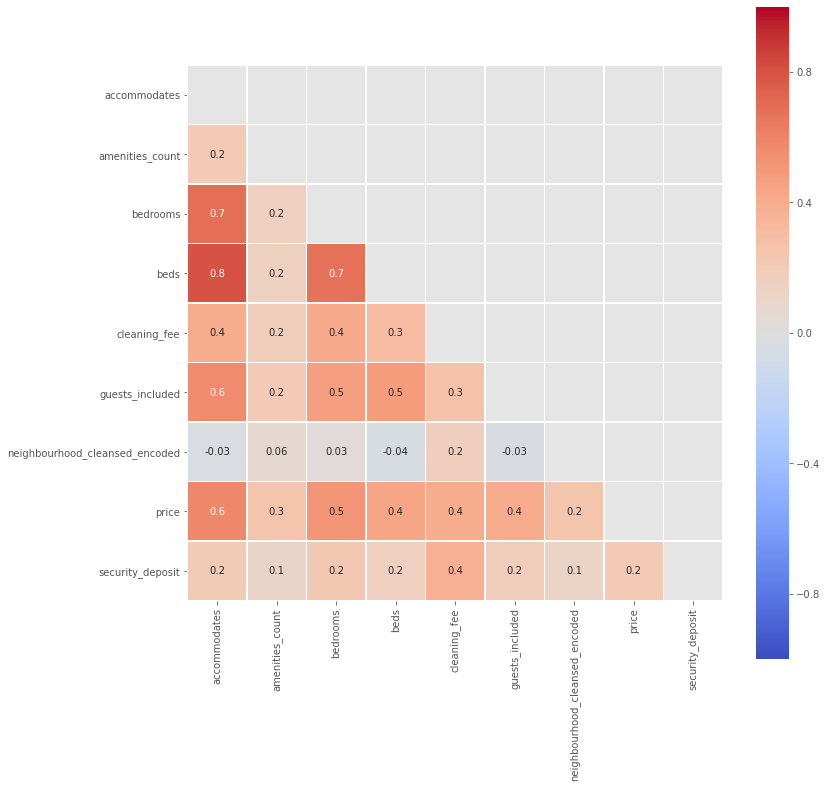

In [14]:
#Create figure
f, ax = plt.subplots(figsize = (12,12))

#Create corr
corr = df[features].corr()

#Create mask
matrix = np.triu(m = corr)

#Plot heatmap
sns.heatmap(corr, ax=ax, annot=True, fmt='.1g', square=True,mask = matrix,
            vmin = -1, vmax=1, center = 0,cmap = 'coolwarm',
            linewidths=.5, linecolor='white')

In [15]:
#Update df
df = df[features]

**Check data**

In [16]:
#Check data before writing to csv
print('Data shape:',df.shape)
display(df.head())

Data shape: (116180, 12)


,accommodates,amenities_count,bedrooms,beds,cleaning_fee,guests_included,neighbourhood_cleansed_encoded,price,security_deposit,room_type,property_type,bed_type
0,3,26,1.0,2.0,100.0,2,177.720127,170.0,100.0,Entire home/apt,Apartment,Real Bed
1,2,16,1.0,1.0,50.0,1,159.540691,65.0,200.0,Private room,Apartment,Real Bed
3,6,33,2.0,3.0,125.0,1,177.720127,255.0,0.0,Entire home/apt,Apartment,Real Bed
4,3,34,1.0,2.0,50.0,2,172.887796,139.0,0.0,Private room,Condominium,Real Bed
5,2,23,1.0,1.0,50.0,1,177.799610,135.0,2.0,Private room,House,Real Bed


**Write to CSV**

In [17]:
#Set path to save files
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\03_Processed'

#Write files
df.to_csv(path + '/2020_0715_Listings_Processed.csv')